In [1]:
from metrics import load_json_from_file, Metrics, FileHandler
import numpy as np
import matplotlib.pyplot as plt
import math

#Metrics pp stuff
from preprocessing import Preprocessor
from configuration import Hyperparameters as HP

years = [str(y) for y in range(2006, 2015)]
classes_30_cf = ["Asterionellopsis", "bad", "Chaetoceros", "Ciliate_mix", "Corethron", "Cylindrotheca", "Dictyocha","dino30", "detritus", 
	"Chaetoceros_flagellate", "Dinobryon", "Ditylum", "Eucampia", "flagellate_sp3", "Guinardia_delicatula", "Guinardia_flaccida", "Guinardia_striata",
	"Heterocapsa_triquetra", "Laboea_strobila", "Leptocylindrus","pennate", "Phaeocystis", "Pleurosigma", "Prorocentrum", "Pseudonitzschia", 
	"Skeletonema", "Thalassionema", "Thalassiosira", "Thalassiosira_dirty", "Tintinnid"]


#pp = Preprocessor(years, include_classes=classes, train_eg_per_class=HP.number_of_images_per_class)
#pp = Preprocessor(years, include_classes=all_classes, train_eg_per_class=HP.number_of_images_per_class, thresholding=HP.thresholding)
pp = Preprocessor(years, include_classes=classes_30_cf, strategy = HP.pp_strategy, train_eg_per_class=100, maxN = HP.maxN, 
	minimum =  HP.minimum, transformations = HP.transformations)


777655
3000


testAcc 0.9130360205831904


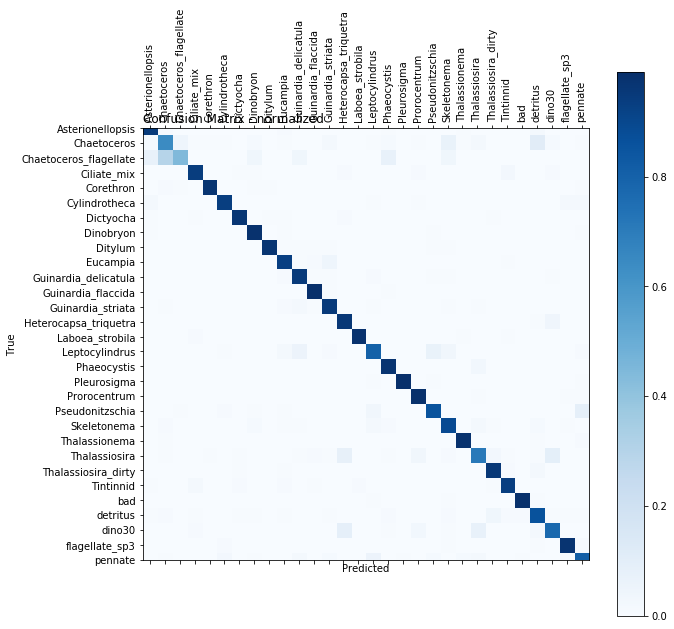

FileNotFoundError: No such file: '/Users/saadghani/Development/URFP_work/data/2010/Chaetoceros/IFCB5_2010_320_213957_11004.png'

In [2]:
# original googlenet. problems.
stats = load_json_from_file("stats/stats-GoogleNet_1.2-4.2.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc']}
print("testAcc", stats['TestAcc'])

test_m = Metrics(stats['Test_Target'], stats['Test_Pred'])
test_m.plot_CM(preprocessor=pp)
test_m.sample_diff(15, classname=1, fname=stats['Test_fnames'])

/home/czm/anaconda3/envs/redtide/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


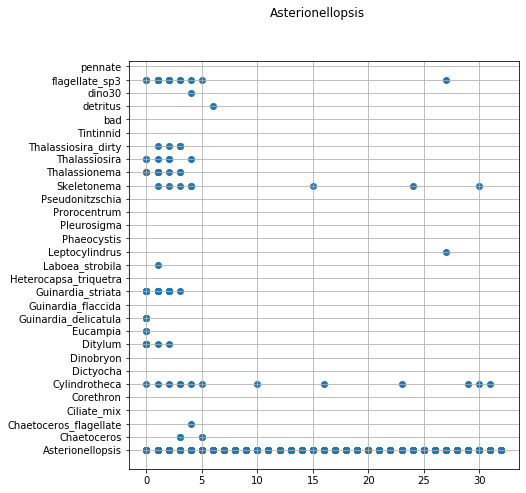

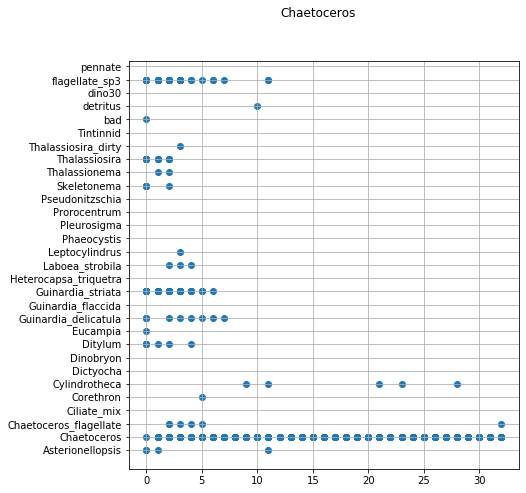

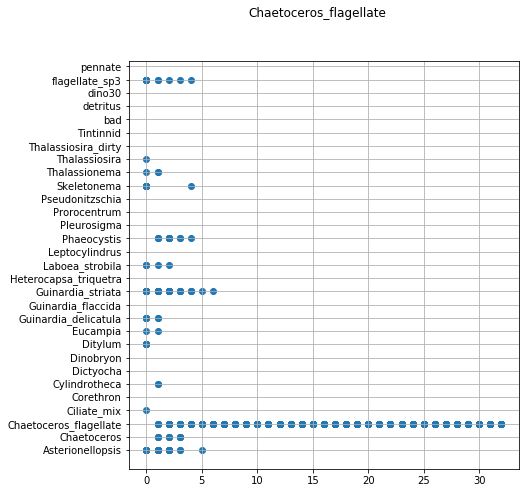

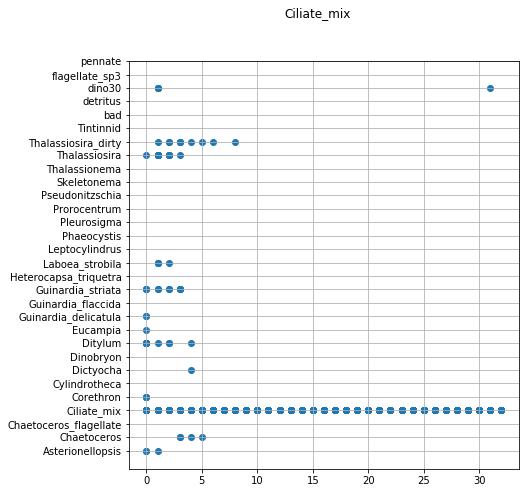

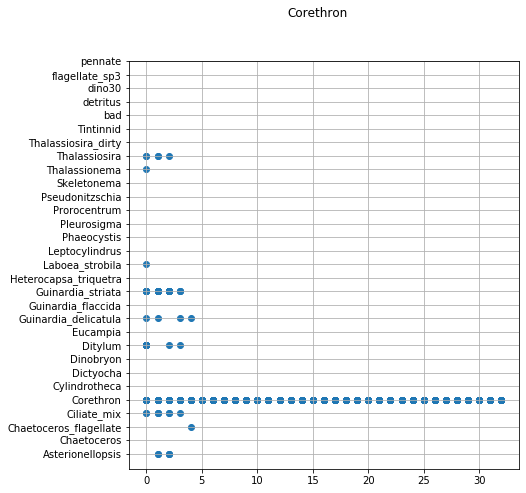

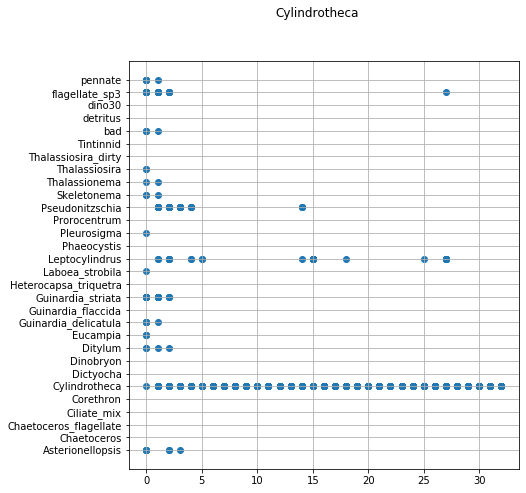

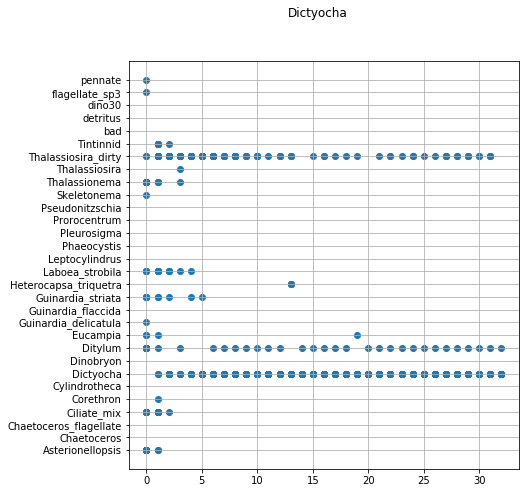

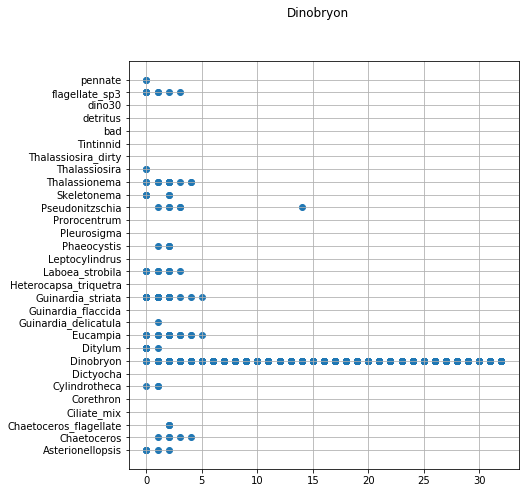

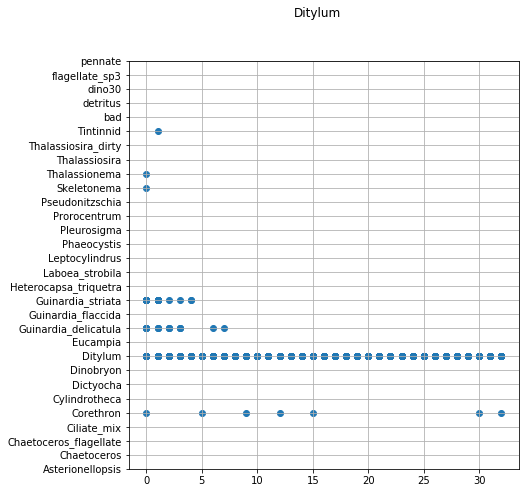

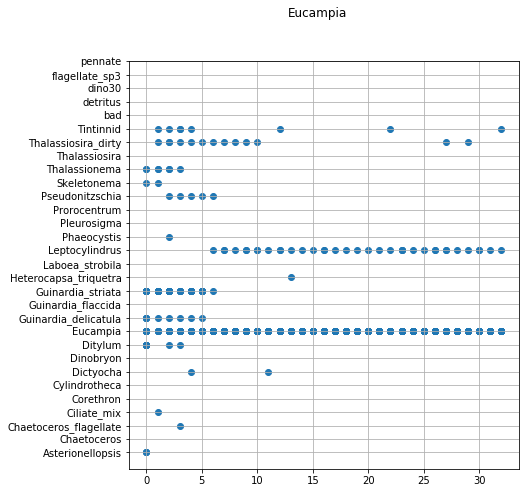

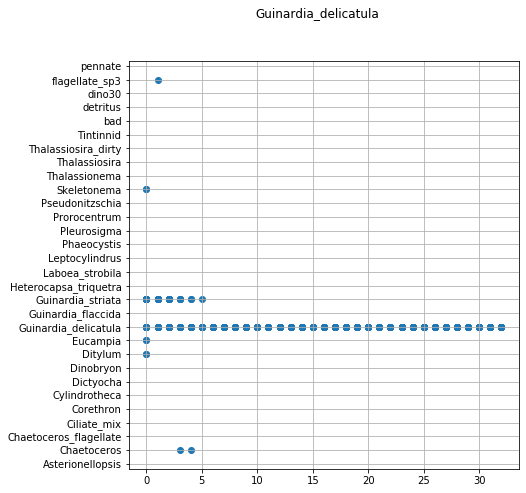

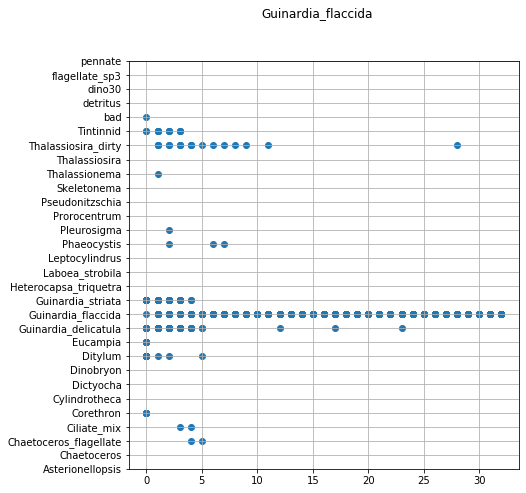

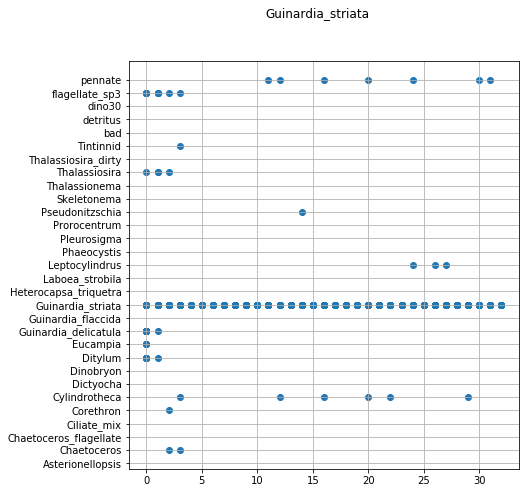

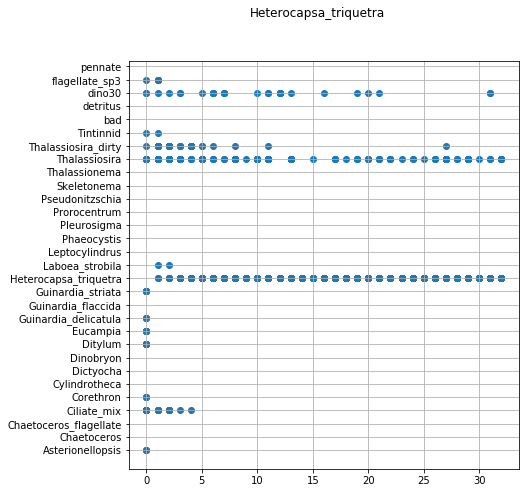

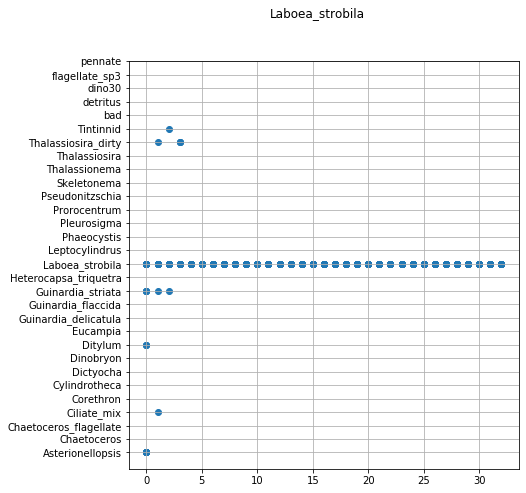

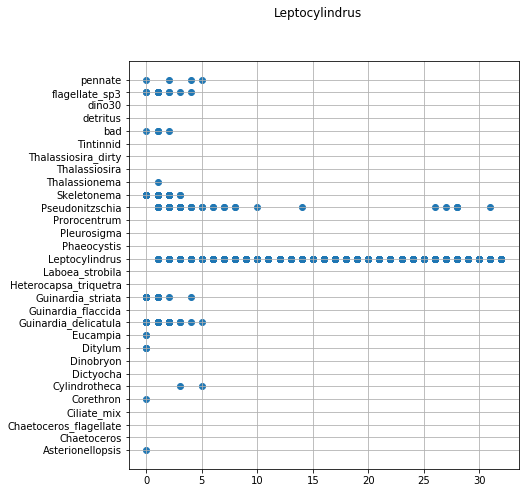

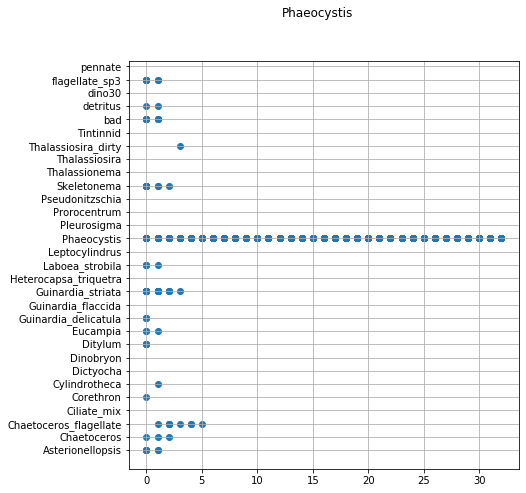

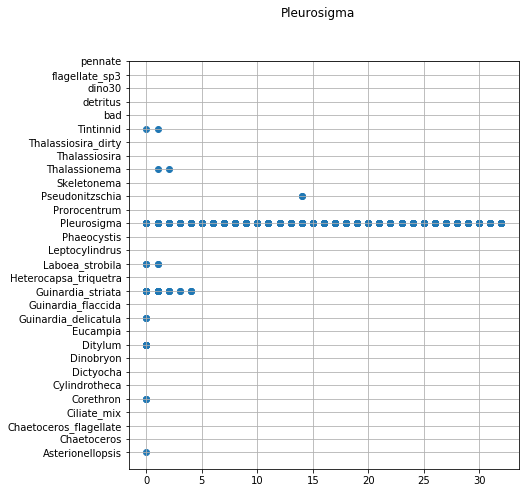

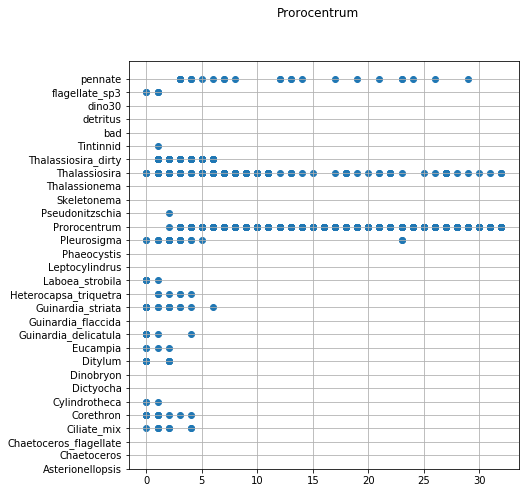

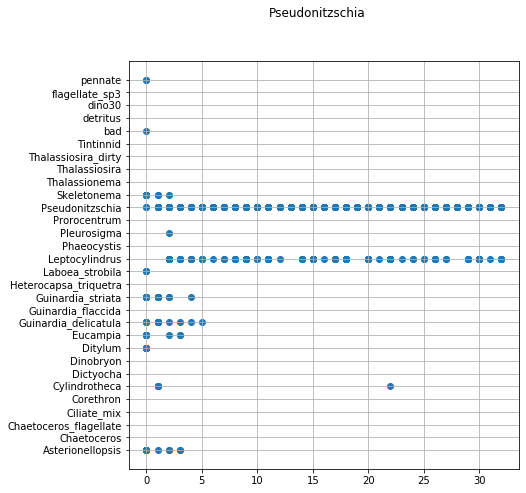

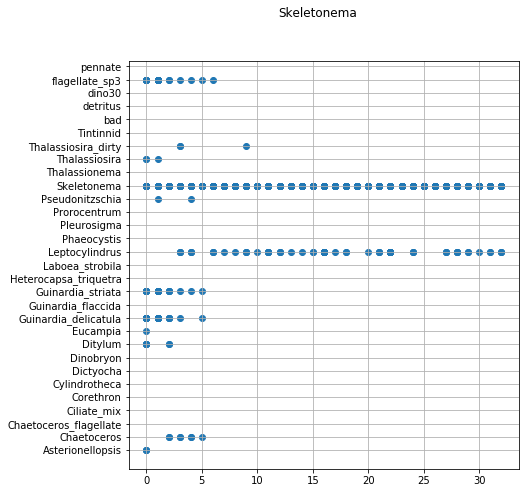

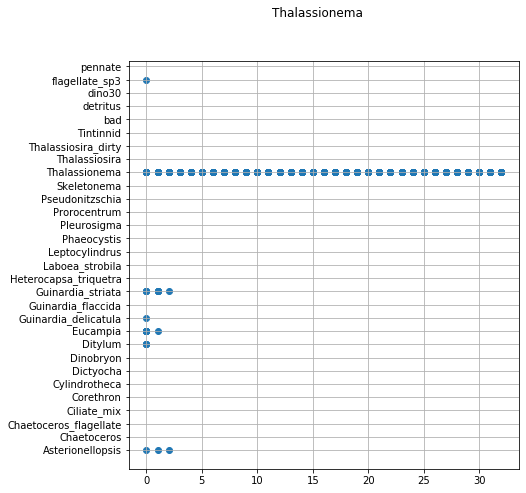

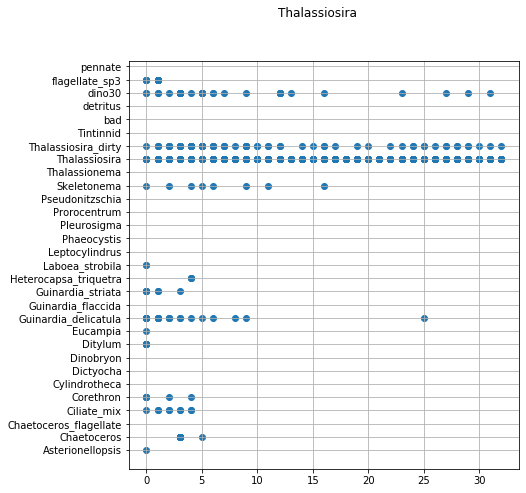

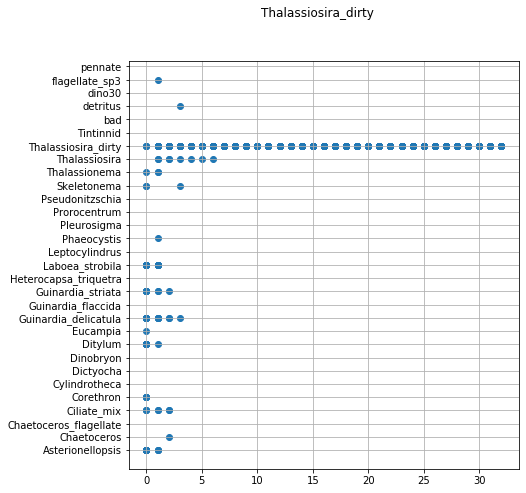

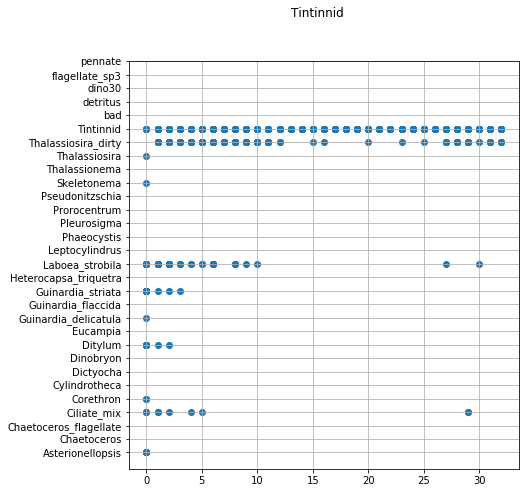

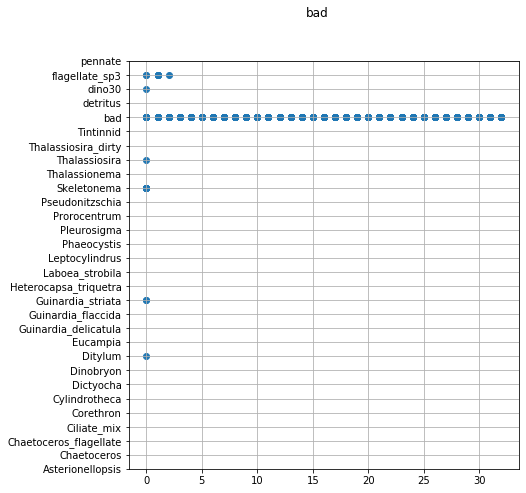

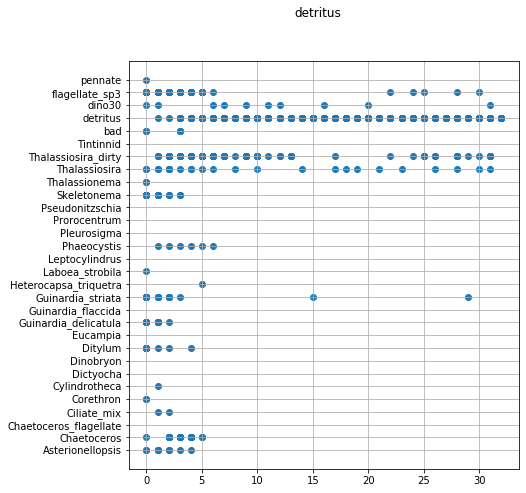

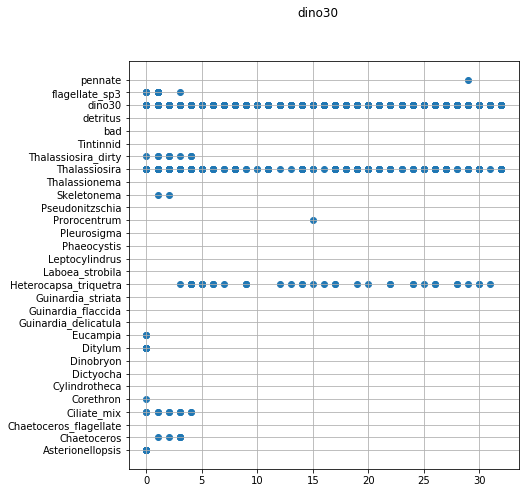

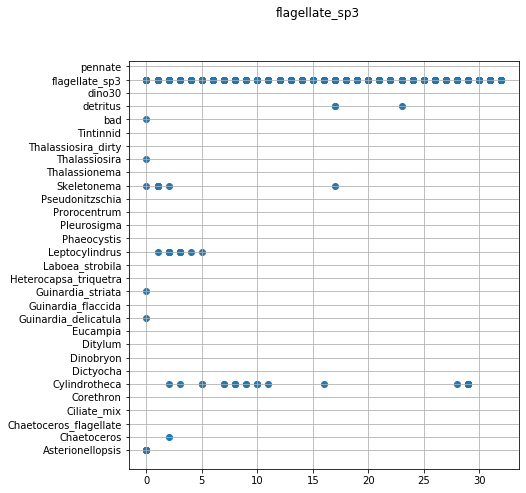

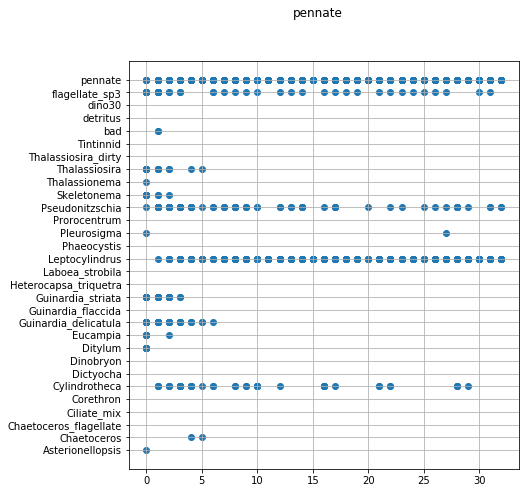

In [2]:
stats_442 = load_json_from_file("stats/stats-GoogleNet_1.2-4.42.json")
test_m = Metrics(stats_442['Test_Target'], stats_442['Test_Pred'])


tr_t = np.array(stats_442["Tr_Trgt_Time"])
tr_p = np.array(stats_442["Tr_Pred_Time"])
cl = []
x = []
for i in range(0, 30):
    idxs = np.where(tr_t[0] == i)
    cl.append([])
    x.append([])
    for j in range(len(tr_p)):
        cl[i].extend(tr_p[j][idxs])
        x[i].extend([j]*len(tr_p[j][idxs]))

classnames = test_m.get_classnames(pp)
for i in range(30):
    fig = plt.figure(figsize=(7,7.5))
    fig.suptitle(classnames[i])
    plt.scatter(x[i], cl[i])
    plt.yticks(np.arange(0,30), classnames)
    plt.grid()
    

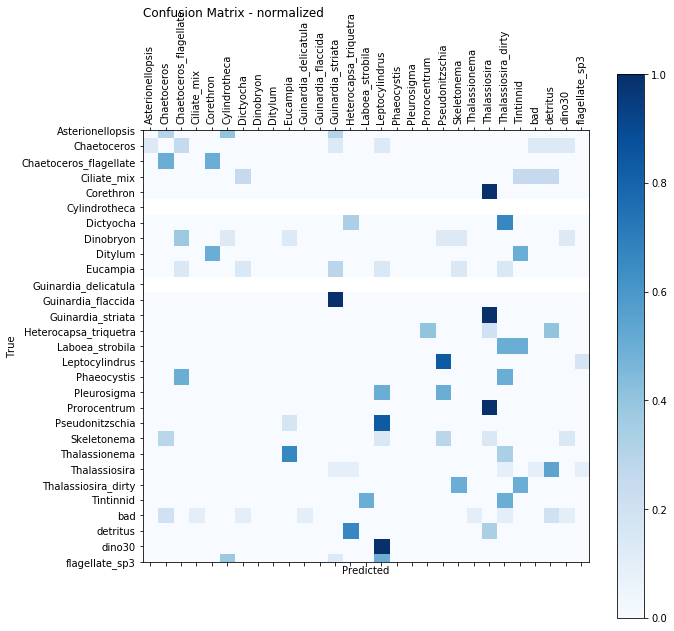

In [5]:
test_m.plot_CM(diff=True, preprocessor=pp, y=1.3)

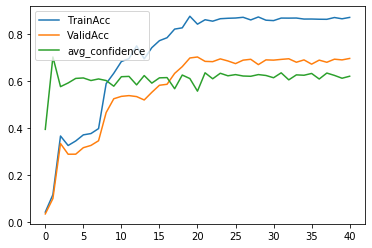

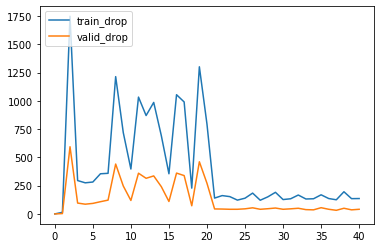

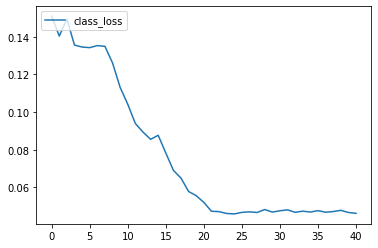

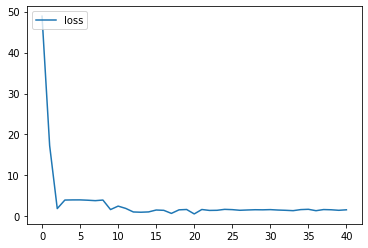

testAcc 0.7096774193548387
Test dropped: 104 / 1880.0


In [18]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.9.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)

print("Test dropped:", len(stats['Test_dropped_fnames']),"/", 100*94*0.2)

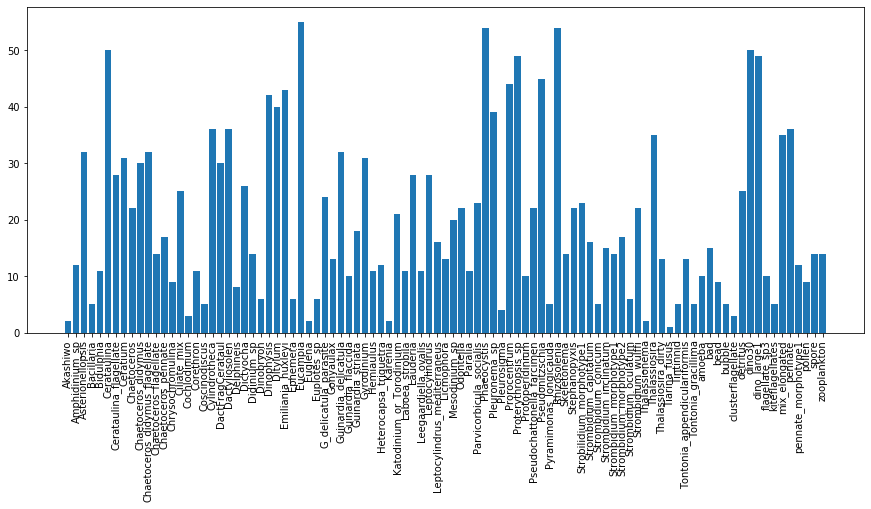

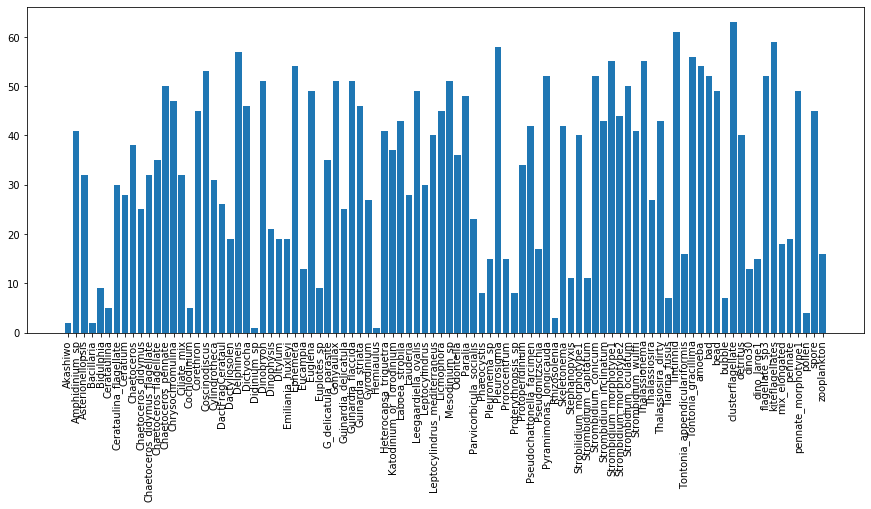

1901
3094


In [3]:
stats = load_json_from_file("stats/stats-GoogleNet_5.8-13.511.json")

dropped_train = FileHandler(stats['Train_dropped_fnames'])
notD_train = FileHandler(stats['Train_fnames'])

dropped_train.plot_counts()
notD_train.plot_counts()

print(dropped_train.get_total_count())
print(notD_train.get_total_count())

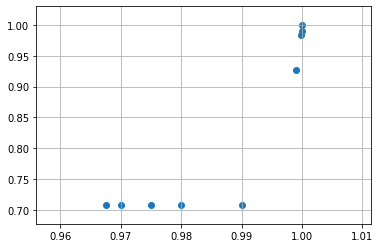

In [6]:
base_name = "stats/stats-GoogleNet_5.3-13.61.json"

snames = [base_name.replace("61", str(i)) for i in range(61, 69)]
snames.insert(0, base_name.replace("61", "6"))

confs = [0.9675, 0.970, 0.975, 0.98, 0.99, 0.999, 0.9999, 0.99999, 0.999999]
log_confs = [math.log10(x) for x in confs]
gns = [load_json_from_file(f) for f in snames]

test_accs = [gn['TestAcc'] for gn in gns]

plt.scatter(confs, test_accs)
plt.grid(b=True, which='both')
plt.show()

In [8]:
train_Met = [Metrics(gn['Train_Target'], gn['Train_Pred']) for gn in gns]
valid_Met = [Metrics(gn['Valid_Target'], gn['Valid_Pred']) for gn in gns]


dropped_train = [FileHandler(gn['Train_dropped_fnames']) for gn in gns]
nD_train = [FileHandler(gn['Train_fnames']) for gn in gns]

dropped_valid = [FileHandler(gn['Valid_dropped_fnames']) for gn in gns]
nD_valid = [FileHandler(gn['Valid_fnames']) for gn in gns]

dropped_test = [FileHandler(gn['Test_dropped_fnames']) for gn in gns]
nD_test = [FileHandler(gn['Test_fnames']) for gn in gns]

for i in range(len(dropped_train)):
    print("confs - "+str(confs[i]))
    
    s = dropped_train[i].get_total_count()
    print("dropped train:", s, "%:", s/(29149*0.6))
    
    s = nD_train[i].get_total_count()
    print("not dropped train:", s, "%:", s/(29149*0.6))
    
    s = dropped_valid[i].get_total_count()
    print("dropped valid:",s, "%:", s/(29149*0.2))
    
    s = nD_valid[i].get_total_count()
    print("not dropped valid:", s, "%:", s/(29149*0.2))
    
    s = dropped_test[i].get_total_count()
    print("dropped test:",s, "%:", s/(29149*0.2))
    
    s = nD_test[i].get_total_count()
    print("not dropped test:", s, "%:", s/(29149*0.2))
    
    print("train acc:", train_Met[i].accuracy())
    print("valid acc:", valid_Met[i].accuracy())
    print("test acc:", gns[i]['TestAcc'])
    
    print()

    

confs - 0.9675
dropped train: 0 %: 0.0
not dropped train: 17489 %: 0.9999771290038539
dropped valid: 0 %: 0.0
not dropped valid: 5830 %: 1.0000343064942194
dropped test: 0 %: 0.0
not dropped test: 5830 %: 1.0000343064942194
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.97
dropped train: 0 %: 0.0
not dropped train: 17489 %: 0.9999771290038539
dropped valid: 0 %: 0.0
not dropped valid: 5830 %: 1.0000343064942194
dropped test: 0 %: 0.0
not dropped test: 5830 %: 1.0000343064942194
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.975
dropped train: 0 %: 0.0
not dropped train: 17489 %: 0.9999771290038539
dropped valid: 0 %: 0.0
not dropped valid: 5830 %: 1.0000343064942194
dropped test: 0 %: 0.0
not dropped test: 5830 %: 1.0000343064942194
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.98
dropped train: 0 %: 0.0
not dropped train: 17489

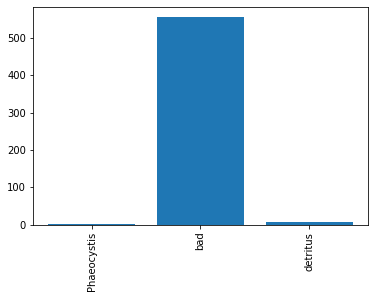

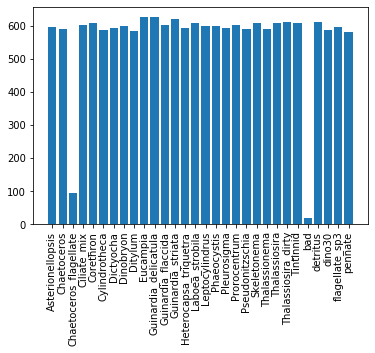

class bad : count = 555
class detritus : count = 8
class Phaeocystis : count = 2
class Heterocapsa_triquetra : count = 592
class Phaeocystis : count = 598
class Guinardia_delicatula : count = 625
class pennate : count = 581
class Corethron : count = 607
class Tintinnid : count = 607
class Pseudonitzschia : count = 590
class Ditylum : count = 585
class dino30 : count = 586
class Guinardia_flaccida : count = 601
class Asterionellopsis : count = 596
class flagellate_sp3 : count = 596
class Guinardia_striata : count = 619
class Thalassionema : count = 589
class Laboea_strobila : count = 609
class Thalassiosira : count = 607
class Cylindrotheca : count = 588
class detritus : count = 611
class Skeletonema : count = 608
class Dictyocha : count = 594
class Chaetoceros : count = 591
class Thalassiosira_dirty : count = 611
class Eucampia : count = 625
class Leptocylindrus : count = 599
class Dinobryon : count = 598
class Ciliate_mix : count = 601
class Prorocentrum : count = 603
class Chaetocero

In [15]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.521.json")

dropped_train = FileHandler(stats['Train_dropped_fnames'])
notD_train = FileHandler(stats['Train_fnames'])

dropped_train.plot_counts()
notD_train.plot_counts()

dropped_train.get_counts()
notD_train.get_counts()

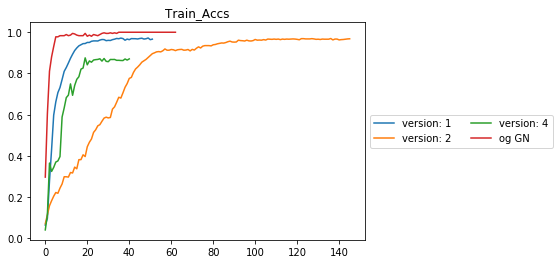

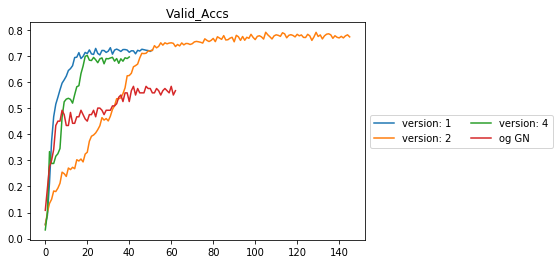

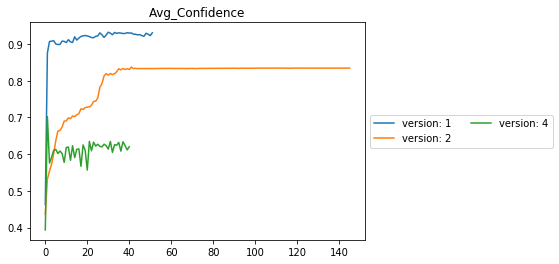

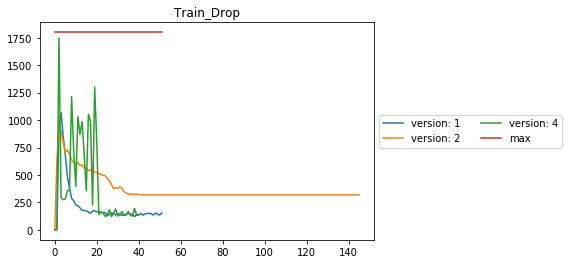

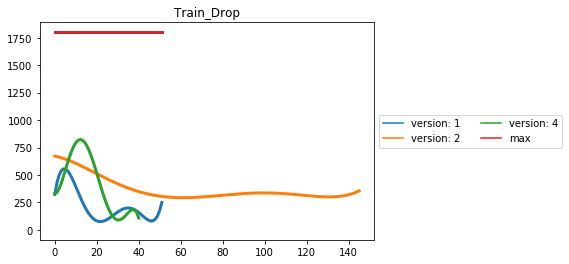

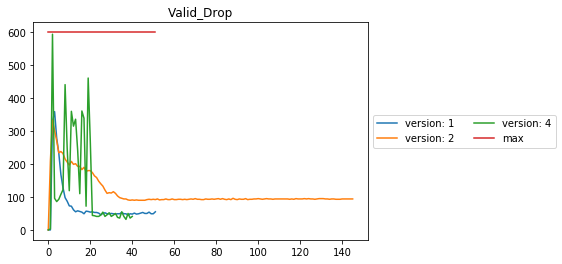

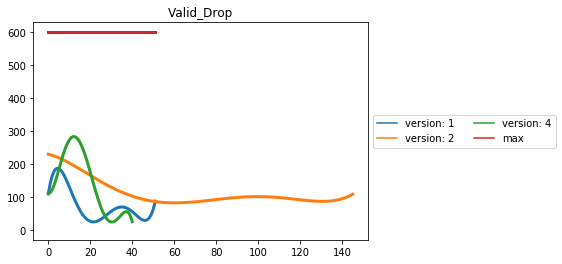

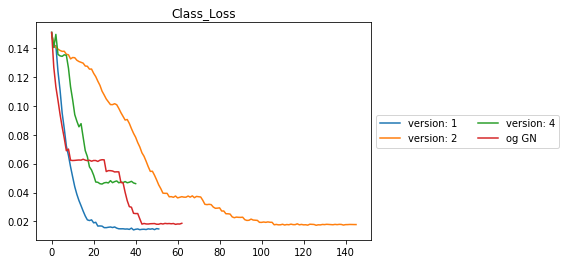

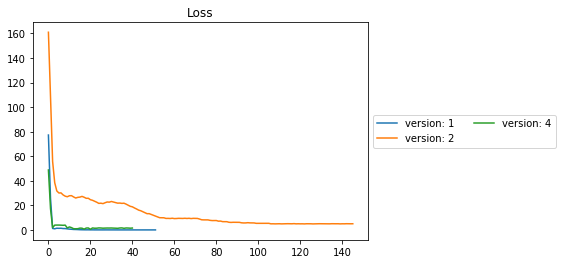

In [15]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.3-13.01.json"
fname = [name]
fname.append(name.replace("01", "51"))
fname.append(name.replace("01", "9"))


version = [1,2,4,6]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"version: "+str(version[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"version: "+str(version[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"version: "+str(version[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"version: "+str(version[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [100*30*0.6 for x in range(len(train_drop['version: '+str(version[0])]))]

valid_drop = {"version: "+str(version[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [100*30*0.2 for x in range(len(valid_drop['version: '+str(version[0])]))]

class_loss = {"version: "+str(version[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"version: "+str(version[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

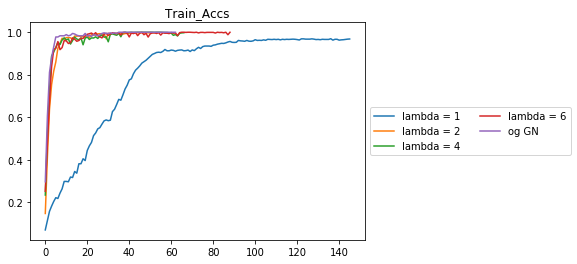

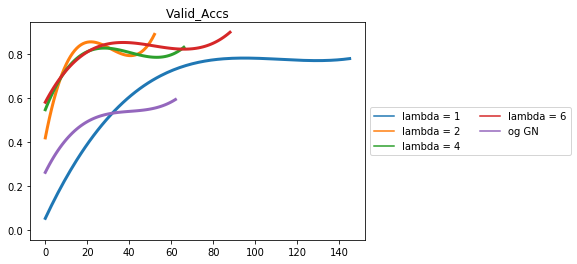

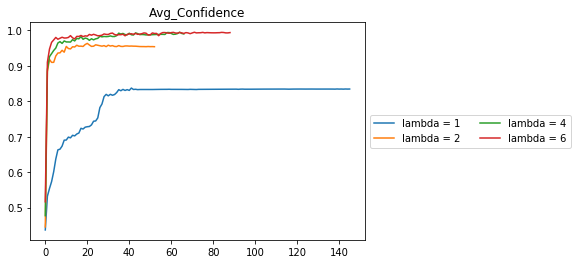

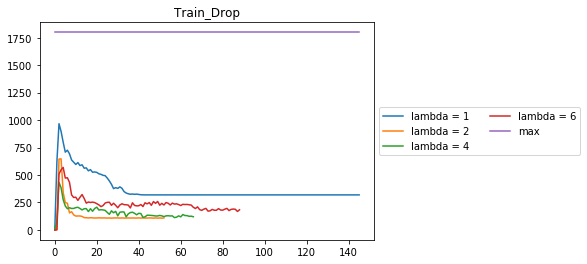

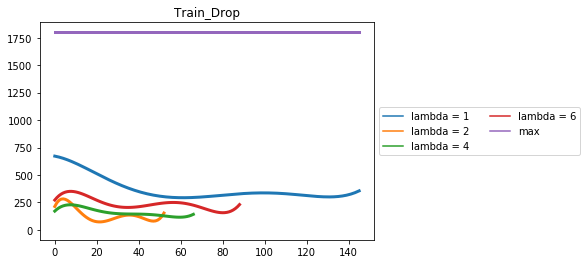

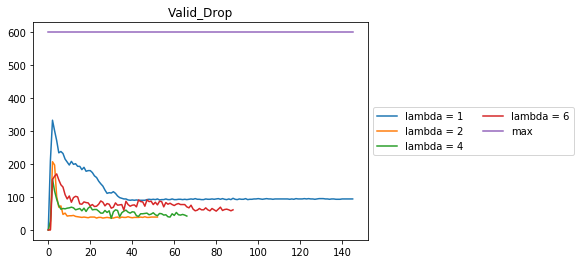

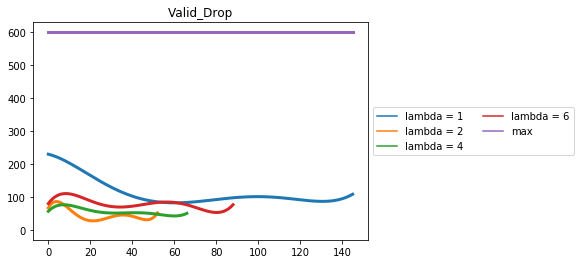

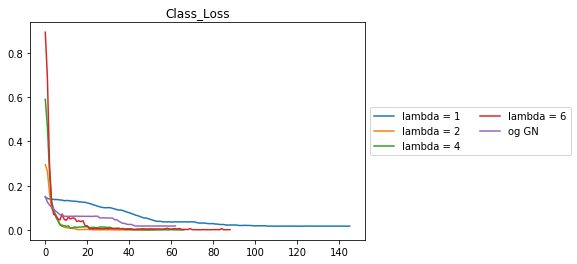

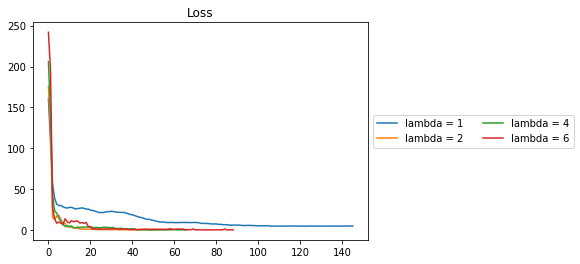

In [11]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.3-13.81.json"
fname = [name.replace("81",str(i)) for i in range(81,83)]
fname.insert(0, name.replace("81", "8"))
fname.insert(0, name.replace("81", "51"))


lambdas = [1,2,4,6]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(lambdas[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(lambdas[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(lambdas[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(lambdas[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [100*30*0.6 for x in range(len(train_drop['lambda = '+str(lambdas[0])]))]

valid_drop = {"lambda = "+str(lambdas[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [100*30*0.2 for x in range(len(valid_drop['lambda = '+str(lambdas[0])]))]

class_loss = {"lambda = "+str(lambdas[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(lambdas[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

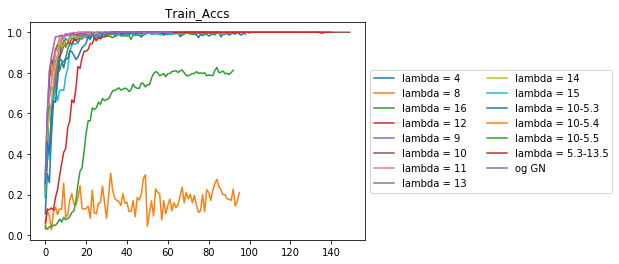

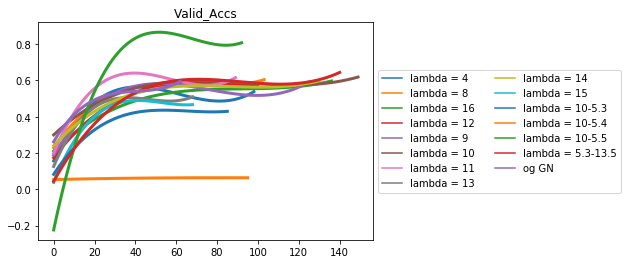

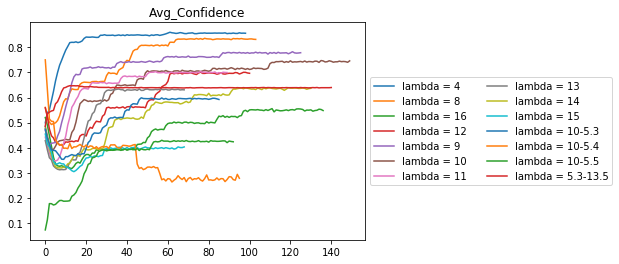

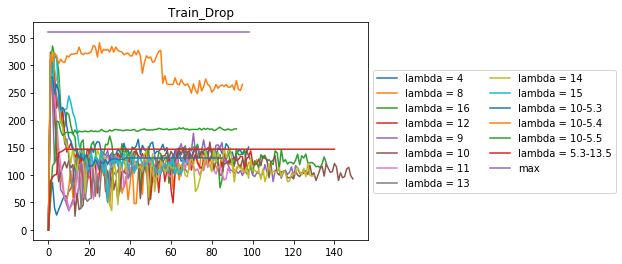

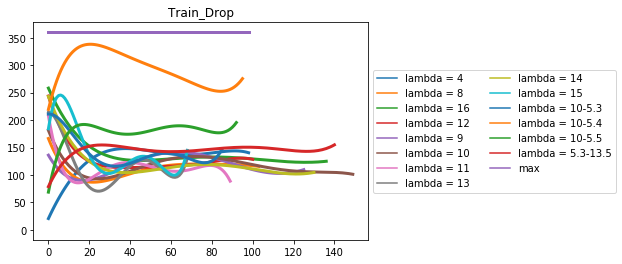

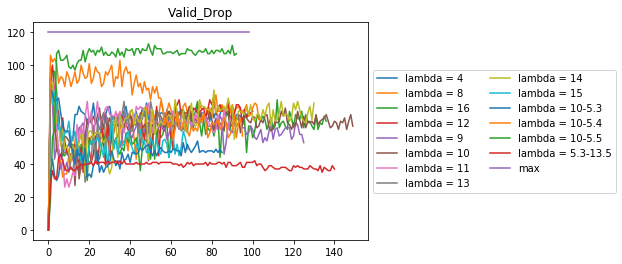

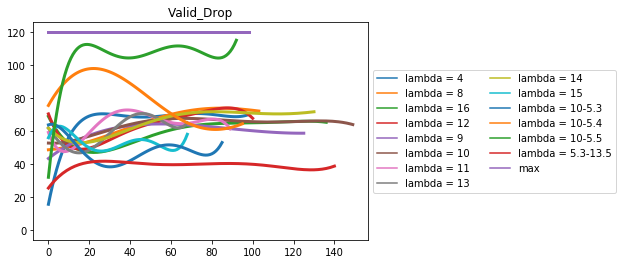

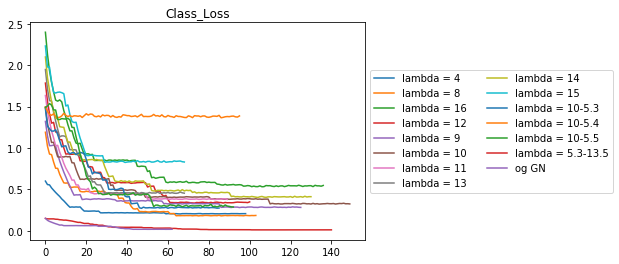

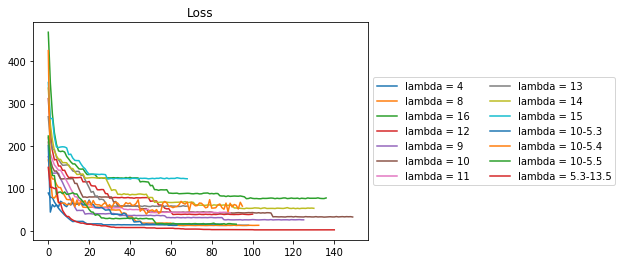

In [31]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.2-13.121.json"
fname = [name.replace("121",str(i)) for i in range(122,125)]
fname.extend([name.replace("121",str(i)) for i in range(126, 130)])
fname.extend([name.replace("121",str(i)) for i in range(1211, 1214)])

fname.append(gn_53_13128)
fname.append(gn_53_13128.replace("_5.3", "_5.4"))
fname.append(gn_53_13128.replace("_5.3", "_5.5"))
fname.append(gn_53_13128.replace("-13.128", "-13.5"))

lambdas = [4,8,16,12,9,10,11,13,14,15, "10-5.3", "10-5.4", "10-5.5", "5.3-13.5"]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(lambdas[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(lambdas[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(lambdas[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(lambdas[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [20*30*0.6 for x in range(len(train_drop['lambda = '+str(lambdas[0])]))]

valid_drop = {"lambda = "+str(lambdas[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [20*30*0.2 for x in range(len(valid_drop['lambda = '+str(lambdas[0])]))]

class_loss = {"lambda = "+str(lambdas[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(lambdas[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

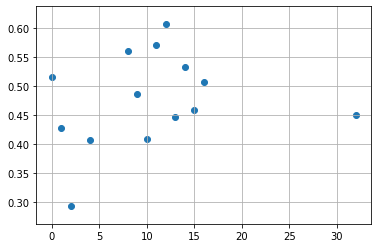

In [24]:
y = [stats['TestAcc'] for stats in gns]
y.pop()
y.append(gn_12_441['TestAcc'])
x = lambdas.copy()
x.pop()
x.append(0)

plt.scatter(x,y)
plt.grid(b=True, which='both')

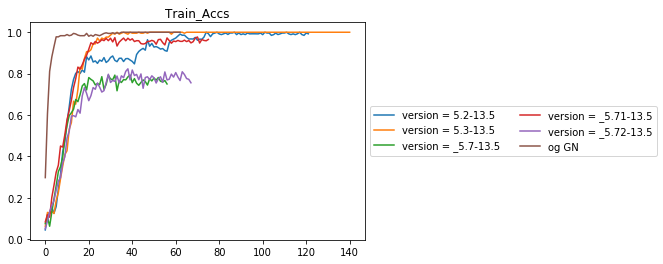

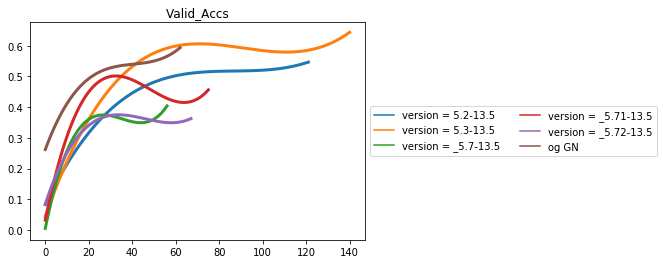

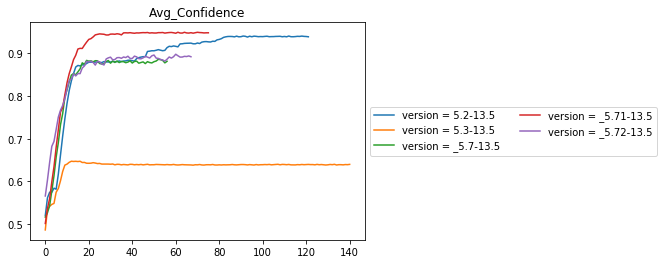

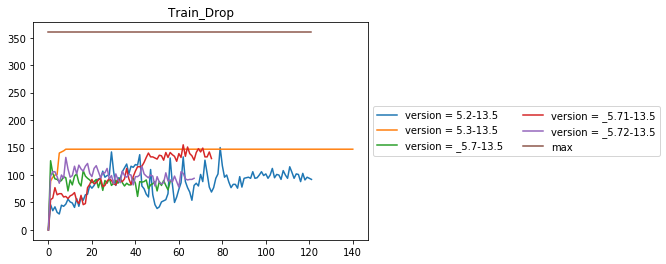

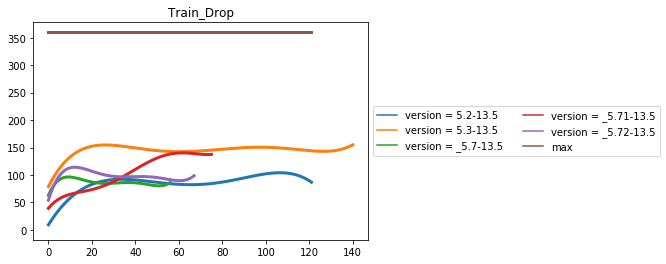

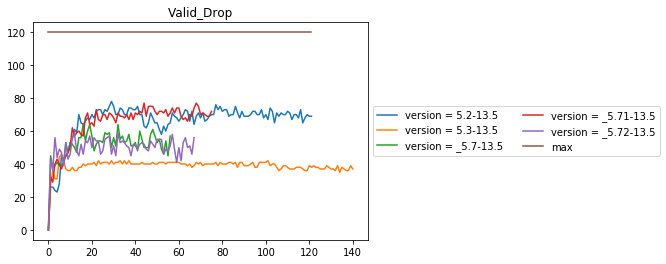

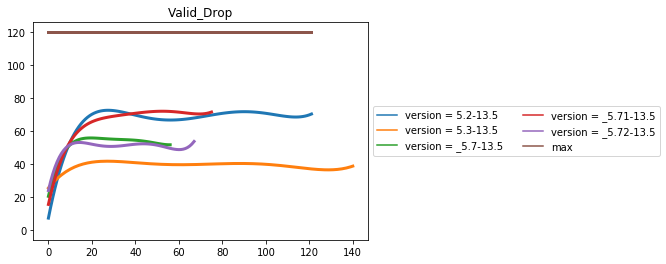

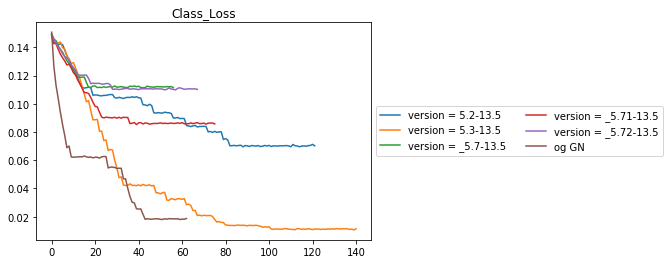

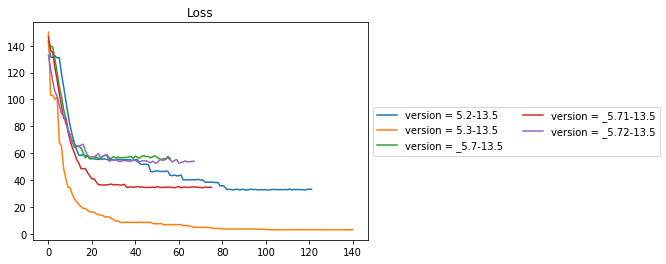

5.2-13.5 test acc: 0.5263157894736842
5.2-13.5 Test dropped: 82 / 120.0
5.3-13.5 test acc: 0.5
5.3-13.5 Test dropped: 38 / 120.0
_5.7-13.5 test acc: 0.28
_5.7-13.5 Test dropped: 70 / 120.0
_5.71-13.5 test acc: 0.2564102564102564
_5.71-13.5 Test dropped: 81 / 120.0
_5.72-13.5 test acc: 0.25
_5.72-13.5 Test dropped: 52 / 120.0


In [30]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
name = "stats/stats-GoogleNet_5.2-13.5.json"
fname = [name.replace("_5.2", i) for i in ["_5.2", "_5.3","_5.7","_5.71","_5.72"]]
version = ["5.2-13.5", "5.3-13.5","_5.7-13.5","_5.71-13.5","_5.72-13.5"]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"version = "+str(version[i]): gns[i]['TrainAcc'] for i in range(len(gns))}
Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"version = "+str(version[i]): gns[i]['ValidAcc'] for i in range(len(gns))}
Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"version = "+str(version[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"version = "+str(version[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [20*30*0.6 for x in range(len(train_drop['version = '+str(version[0])]))]

valid_drop = {"version = "+str(version[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [20*30*0.2 for x in range(len(valid_drop['version = '+str(version[0])]))]

class_loss = {"version = "+str(version[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"version = "+str(version[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

for i in range(len(gns)):
    print(version[i], "test acc:", gns[i]["TestAcc"])
    print(version[i],"Test dropped:", len(gns[i]['Test_dropped_fnames']),"/", 20*30*0.2)


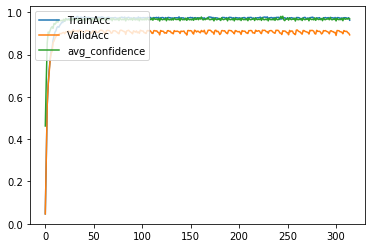

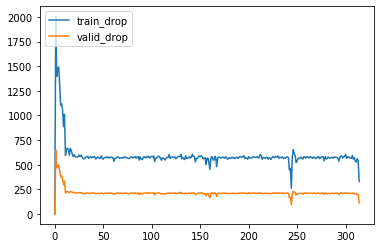

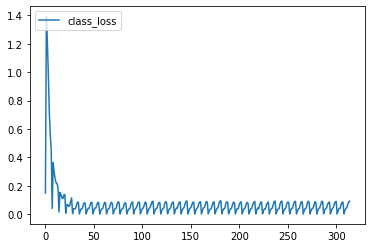

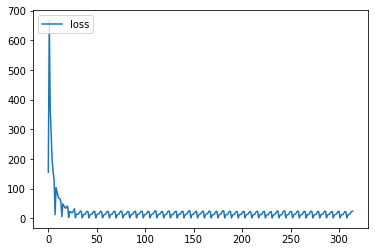

testAcc 0.9115815691158157
Test dropped: 209 / 6000.0


In [10]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.521.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)

print("Test dropped:", len(stats['Test_dropped_fnames']),"/", 1000*30*0.2)

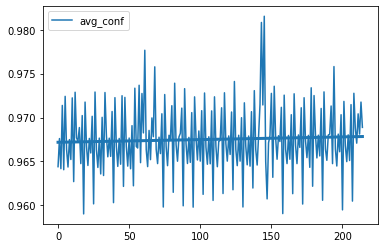

In [16]:
x = {'avg_conf':accs['avg_confidence'][100:]}

Metrics.plot_series(x, show_avgs=1).py

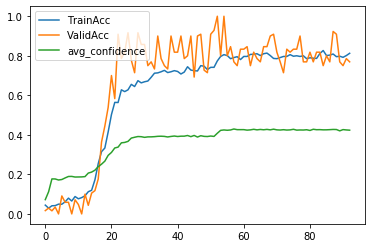

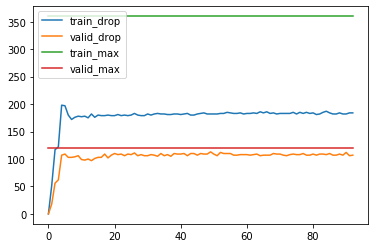

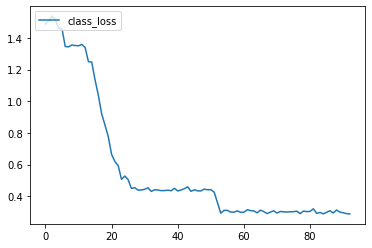

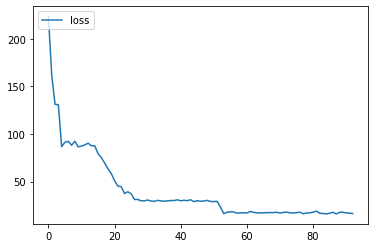

testAcc 0.8571428571428571


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.128.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


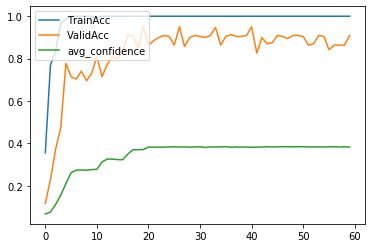

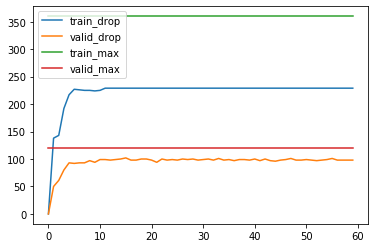

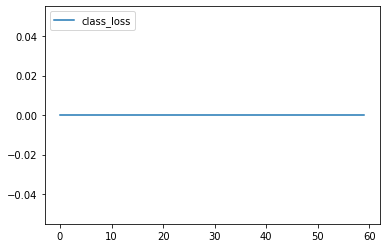

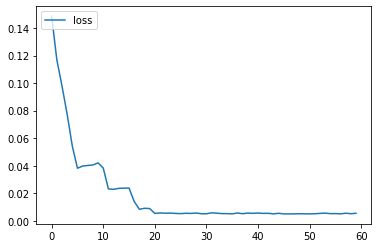

testAcc 0.4666666666666667


In [12]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.4.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


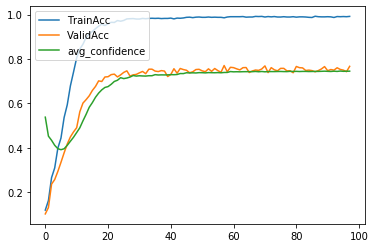

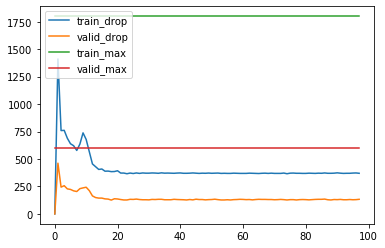

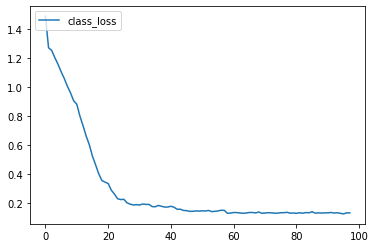

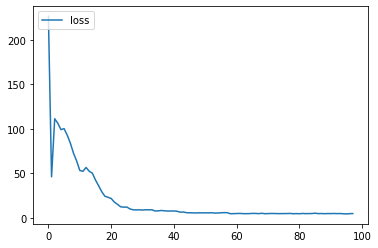

testAcc 0.7801268498942917


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.3.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [100*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [100*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


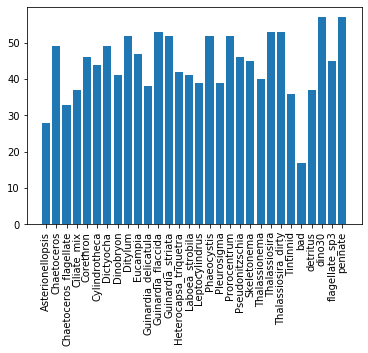

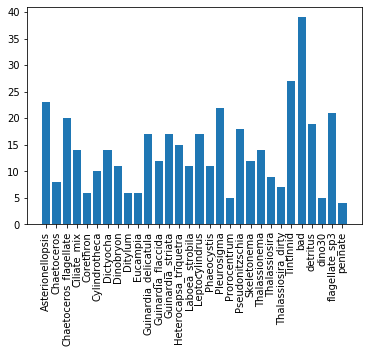

In [ ]:
dropped_train.sample()

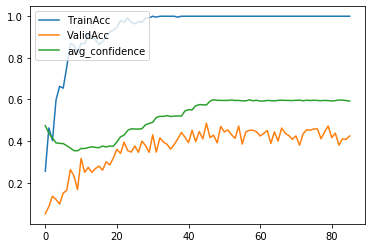

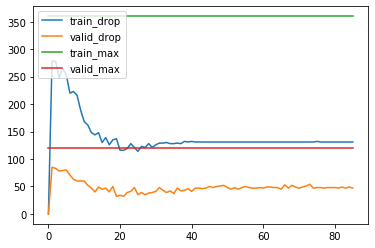

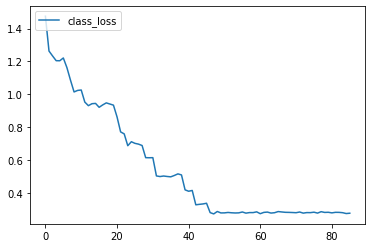

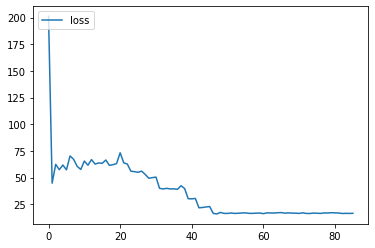

testAcc 0.46153846153846156


In [13]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.128.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


In [ ]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.12-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

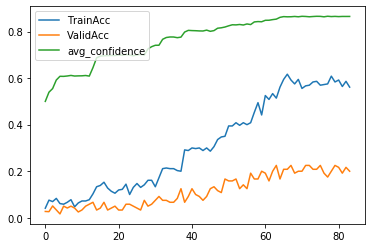

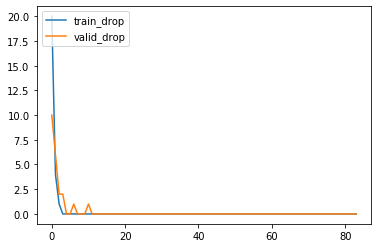

In [7]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.13-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

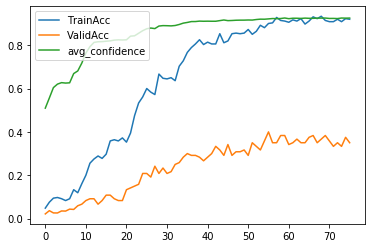

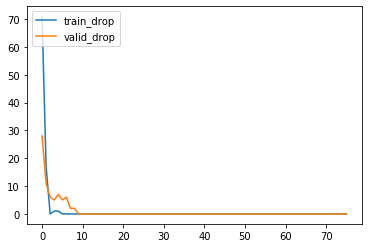

In [8]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.14-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

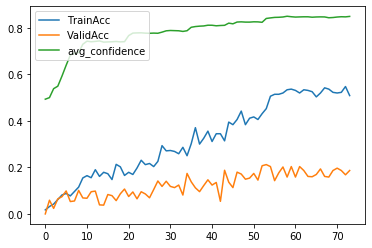

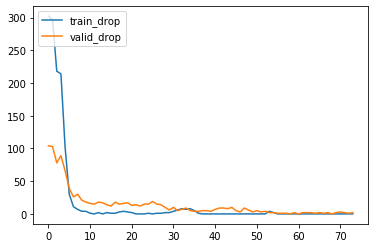

In [9]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.15-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

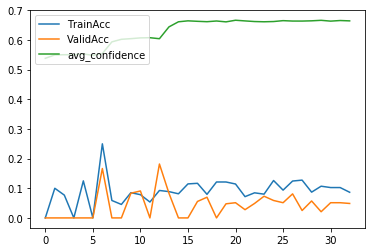

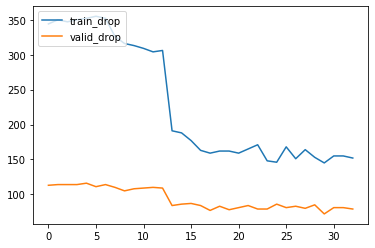

In [11]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.16-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

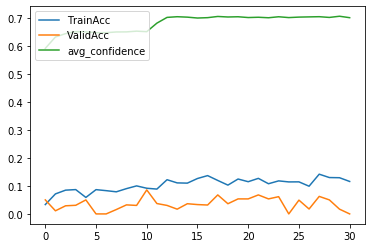

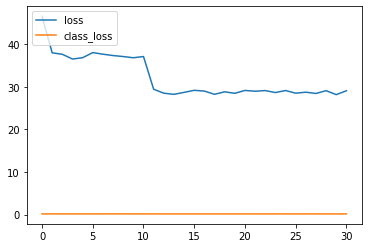

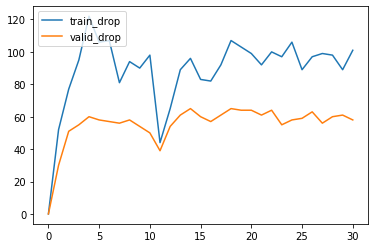

In [19]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

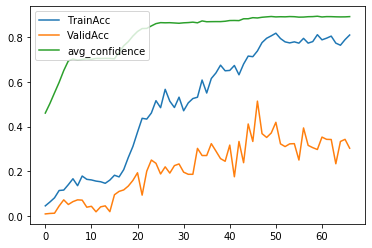

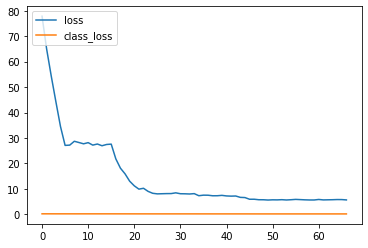

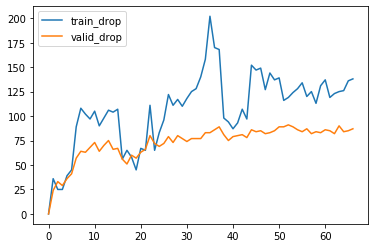

In [21]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

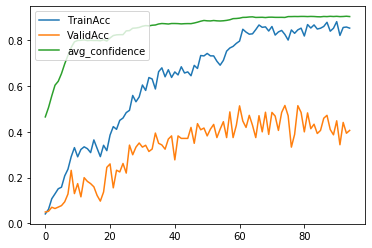

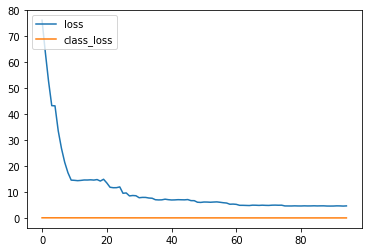

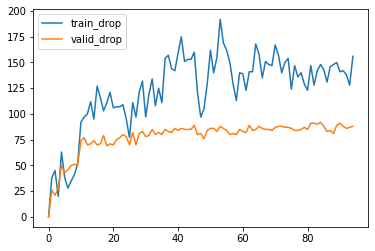

In [22]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

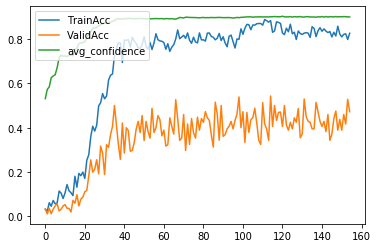

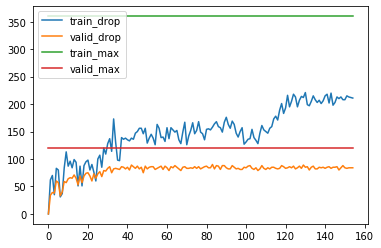

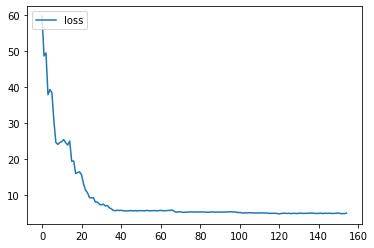

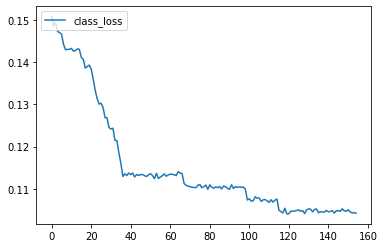

In [29]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.12.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

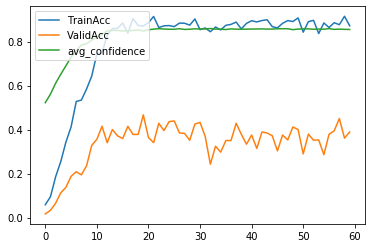

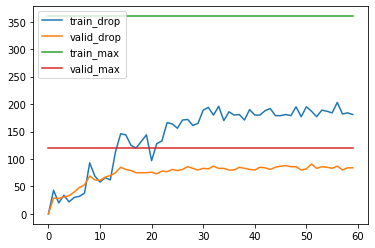

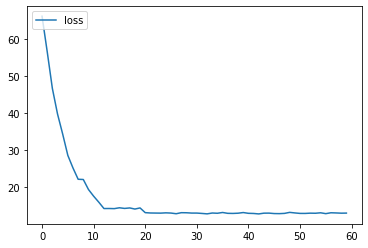

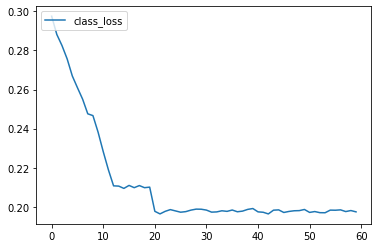

In [30]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.121.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

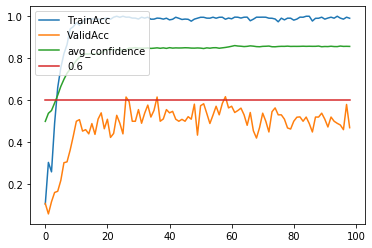

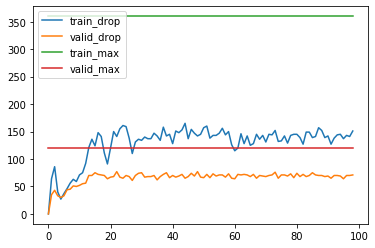

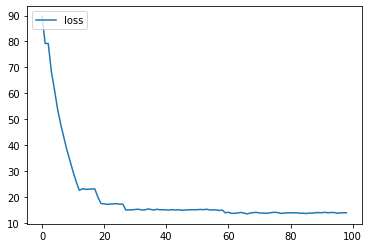

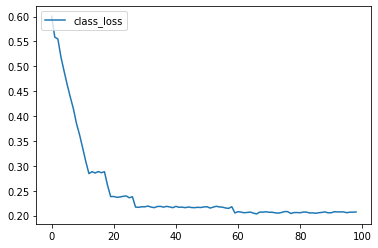

In [37]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.122.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

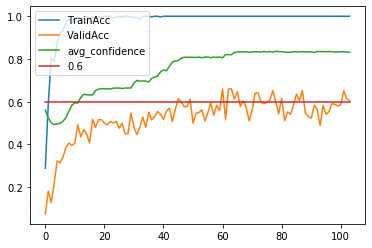

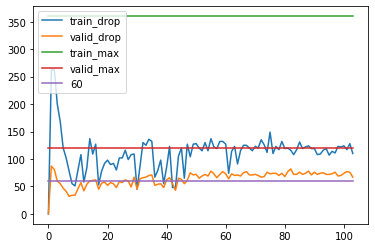

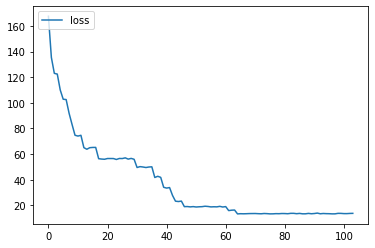

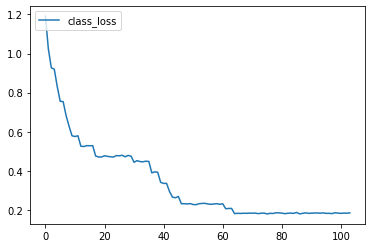

In [41]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.123.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]
drops['60'] = [60 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

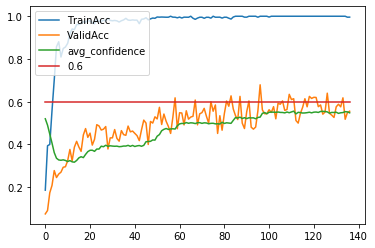

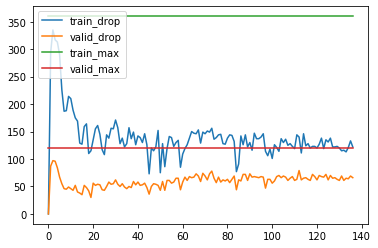

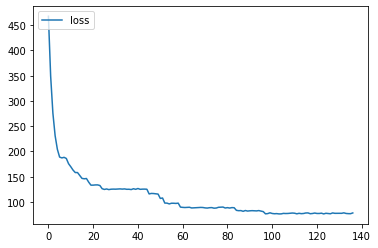

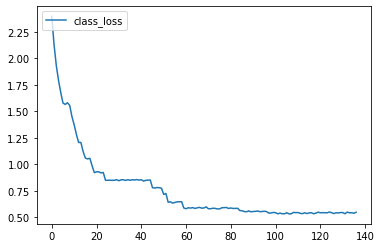

In [39]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.124.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

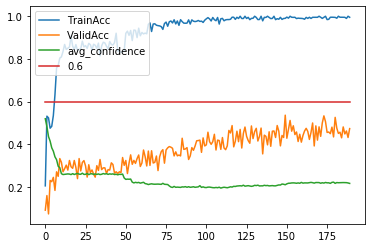

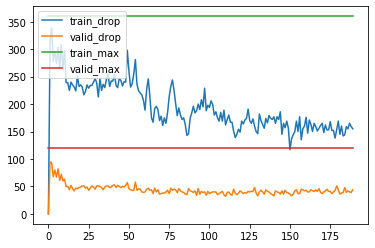

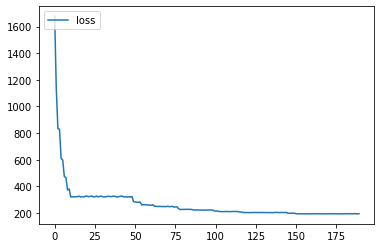

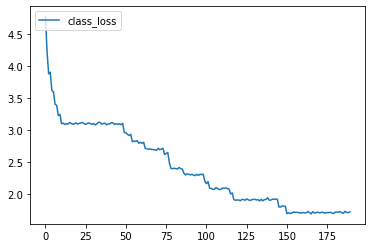

In [40]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.125.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

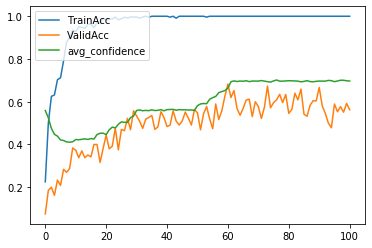

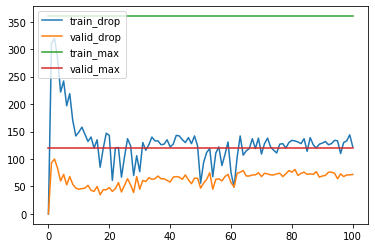

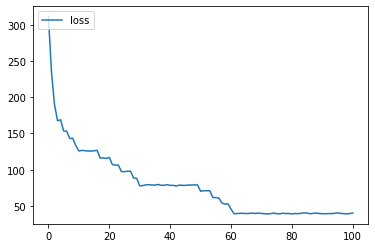

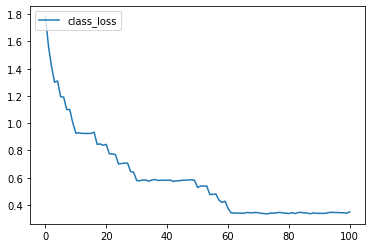

In [35]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.126.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

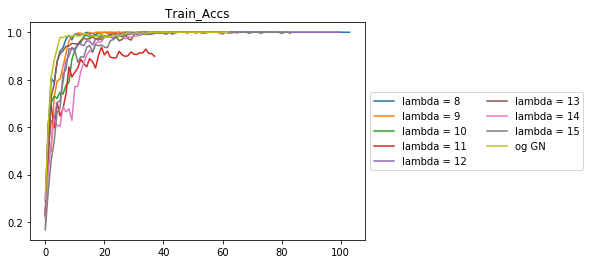

/Users/saadghani/Development/miniconda3/envs/URFP_Plankton/lib/python3.7/site-packages/numpy/polynomial/polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


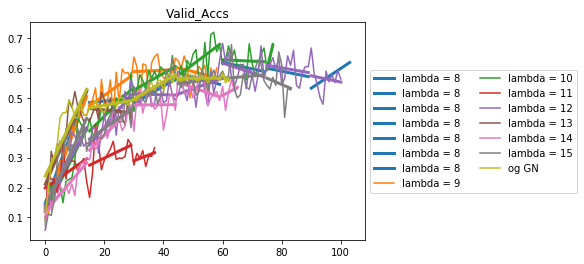

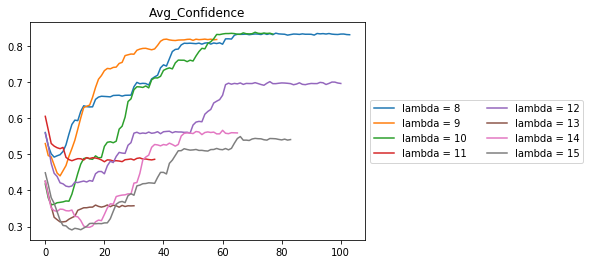

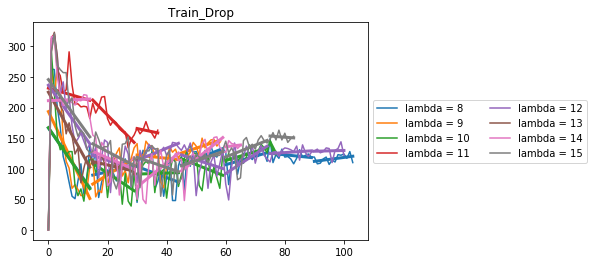

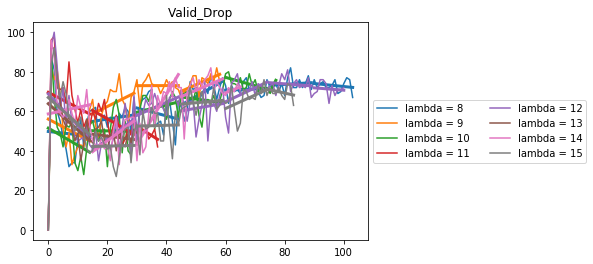

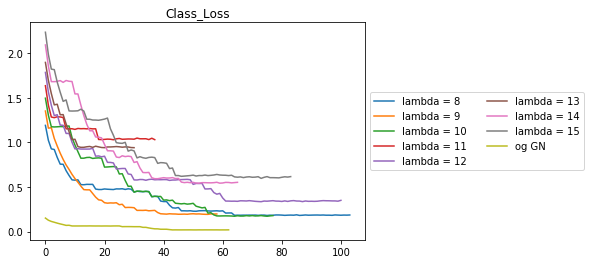

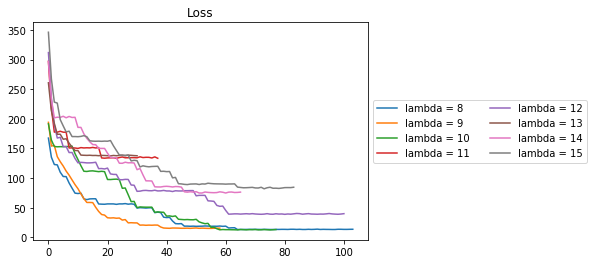

In [2]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")

name = "stats/stats-GoogleNet_5.2-13.121.json"
fname = [name.replace("121",str(i)) for i in range(127, 130)]
fname.extend([name.replace("121",str(i)) for i in range(1211, 1214)])
fname.insert(0, name.replace("121", "123"))
fname.insert(4, name.replace("121", "126"))


gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(i+8): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(i+8): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(i+8): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(i+8): gns[i]['train_drop'] for i in range(len(gns))}

valid_drop = {"lambda = "+str(i+8): gns[i]['valid_drop'] for i in range(len(gns))}

class_loss = {"lambda = "+str(i+8): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(i+8): gns[i]['loss'] for i in range(len(gns))}



Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), avg=(15, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), avg=15)
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), avg=15)
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))


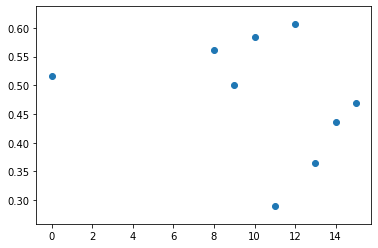

In [65]:
import matplotlib.pyplot as plt

y = [stats['TestAcc'] for stats in gns]
y.append(gn_12_441['TestAcc'])
x = [(i+8) for i in range(len(gns))]

x.append(0)
plt.scatter(x,y)



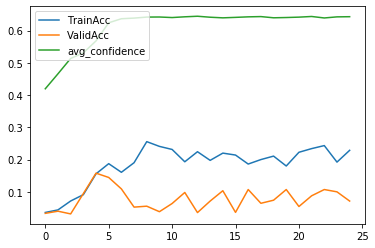

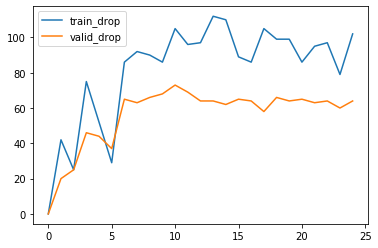

In [23]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.11.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

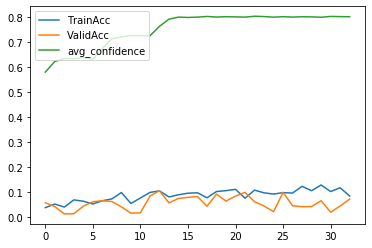

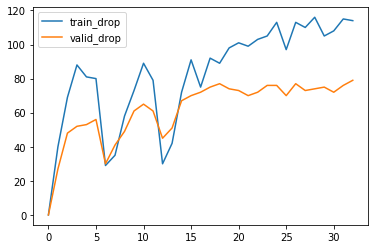

In [20]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.2.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

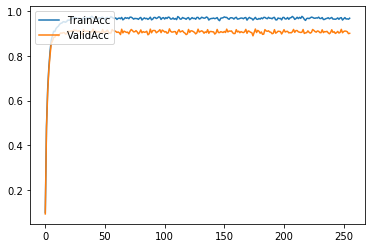

0.9105


In [16]:
ae_21_101 = load_json_from_file("stats/stats-GoogleNet_1.3-4.2.json")
train_val = {'TrainAcc': ae_21_101['TrainAcc'], 'ValidAcc': ae_21_101['ValidAcc']}
Metrics.plot_series(train_val)

print(ae_21_101['TestAcc'])

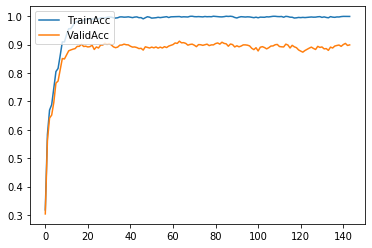

0.9128847157016171


In [17]:
ae_21_101 = load_json_from_file("stats/stats-GoogleNet_1.2-4.2.json")
train_val = {'TrainAcc': ae_21_101['TrainAcc'], 'ValidAcc': ae_21_101['ValidAcc']}
Metrics.plot_series(train_val)

print(ae_21_101['TestAcc'])